<a href="https://colab.research.google.com/github/gcalanch/DMA-Caras/blob/main/EigenfacesGC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# conexion al Google Drive
from google.colab import drive
drive.mount('/content/.drive')


Drive already mounted at /content/.drive; to attempt to forcibly remount, call drive.mount("/content/.drive", force_remount=True).


In [2]:
  # Importacion de librerias
  import mediapipe as mp

In [3]:
  # Importacion de librerias
import os
import cv2
import sys
import numpy as np


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade scipy

In [ ]:
!pip install --upgrade mediapipe

In [28]:
def cargar_datos(directorio_compartido):
    """
    Carga los datos de todos los archivos en el directorio
    compartido y sus subcarpetas, manteniendo la información
    de la carpeta de origen.

    Args:
        directorio_compartido (str): Ruta del directorio
        donde están las carpetas y archivos.

    Returns:
        list: Una lista de tuplas, donde cada tupla contiene:
              (nombre_archivo, imagen, carpeta_origen)
    """
    datos_cargados = []

    # Verificar si el directorio existe
    if not os.path.exists(directorio_compartido):
       print(f"El directorio {directorio_compartido} no existe.")
       return None

    # Recorremos todas las carpetas y archivos dentro del directorio
    for root, dirs, files in os.walk(directorio_compartido):
        for file in files:
            archivo_path = os.path.join(root, file)
            carpeta_origen = os.path.basename(root) # Obtener nombre de la carpeta

            # Leer el contenido del archivo
            try:
                # Usamos cv2.imread para leer la imagen en escala de grises
                imagen = cv2.imread(archivo_path, cv2.IMREAD_GRAYSCALE)

                if imagen is not None:
                    datos_cargados.append((file, imagen, carpeta_origen))
                else:
                    print(f"Error al leer el archivo {archivo_path}: No se pudo cargar la imagen.")

            except Exception as e:
                print(f"Error al leer el archivo {archivo_path}: {e}")

    return datos_cargados

In [5]:
########### DEFINICION ANTERIOR ####
# def cargar_datos(directorio_compartido):
    """
    Carga los datos de todos los archivos en el directorio compartido y sus subcarpetas.

    Args:
        directorio_compartido (str): Ruta del directorio donde están las carpetas y archivos.

    Returns:
        dict: Un diccionario con los nombres de los archivos como claves y el contenido de cada archivo como valores.
    """
    datos_cargados = {}

    # Verificar si el directorio existe
    if not os.path.exists(directorio_compartido):
       print(f"El directorio {directorio_compartido} no existe.")
       return None

    # Recorremos todas las carpetas y archivos dentro del directorio
    for root, dirs, files in os.walk(directorio_compartido):
        for file in files:
            archivo_path = os.path.join(root, file)

            # Leer el contenido del archivo
            try:
                # Usamos cv2.imread para leer la imagen en escala de grises
                imagen = cv2.imread(archivo_path, cv2.IMREAD_GRAYSCALE)

                if imagen is not None: #Verificamos que se cargó la imagen correctamente.
                    datos_cargados[file] = imagen
                else:
                    print(f"Error al leer el archivo {archivo_path}: No se pudo cargar la imagen.")

            except Exception as e:
                print(f"Error al leer el archivo {archivo_path}: {e}")

    return datos_cargados

In [ ]:
# Llamada a la funcion de carga de imagenes:
directorio_compartido = '/content/.drive/MyDrive/DMA/Eigenfaces'
imagenes = cargar_datos(directorio_compartido)


In [39]:
# Formato dentro de "imagenes"
# nombre_archivo, imagen, carpeta_origen

# Guardar en lista_imagenes solo los datos de las imagenes

lista_imagenes = []
for nombre_archivo, imagen, carpeta_origen in imagenes:
  lista_imagenes.append((imagen))


In [38]:
print(f"Se cargaron {len(lista_imagenes)} imágenes.")

Se cargaron 0 imágenes.


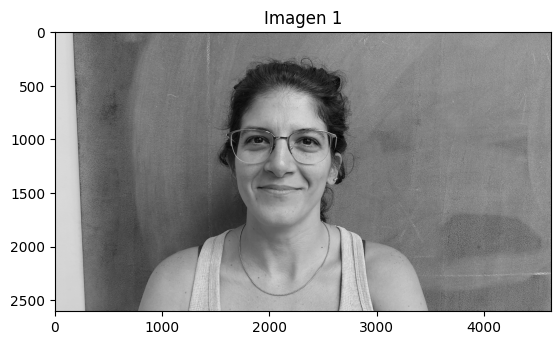

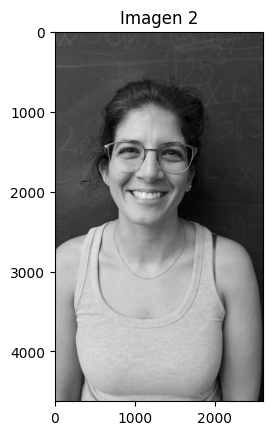

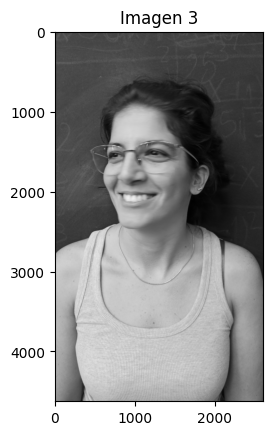

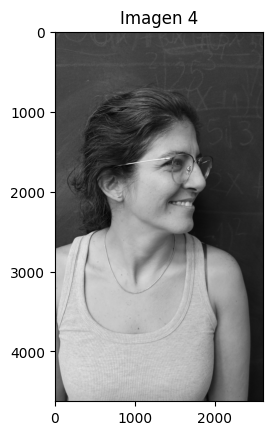

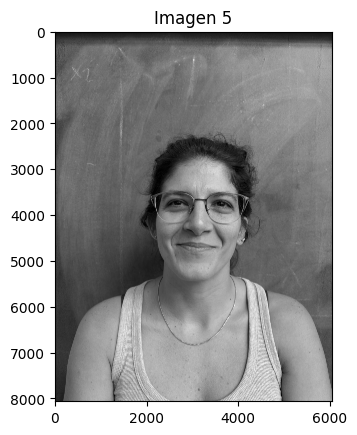

In [9]:
# Mostrar imagenes importadas
import matplotlib.pyplot as plt

# Mostrar las primeras 5 imágenes
for i in range(min(5, len(lista_imagenes))):
    plt.imshow(lista_imagenes[i], cmap='gray')  # Usar lista_imagenes en lugar de imagenes
    plt.title(f"Imagen {i + 1}")
    plt.show()

In [13]:
# Definicion de funcion para Identificar y recortar las caras de las imagenes en lista_imagenes

mp_face_detection = mp.solutions.face_detection

def recortar_caras(lista_imagenes):
  """
  Identifica y recorta las caras de las imágenes en una lista.

  Args:
    lista_imagenes: Una lista de imágenes en formato NumPy array.

  Returns:
    Una lista de imágenes recortadas, donde cada elemento es una imagen
    que contiene una cara detectada.
  """

  caras_recortadas = []
  with mp_face_detection.FaceDetection(
      model_selection=1, min_detection_confidence=0.5) as face_detection:
    for imagen in lista_imagenes:
      # Convertir la imagen a RGB, ya que MediaPipe lo requiere
      imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
      # Procesar la imagen con MediaPipe Face Detection
      results = face_detection.process(imagen_rgb)

      if results.detections:
          for detection in results.detections:
              # Obtener las coordenadas de la bounding box de la cara
              bboxC = detection.location_data.relative_bounding_box
              ih, iw = imagen.shape[:2]
              x, y, w, h = int(bboxC.xmin * iw), int(bboxC.ymin * ih), int(bboxC.width * iw), int(bboxC.height * ih)

              # Recortar la imagen
              cara_recortada = imagen[y:y+h, x:x+w]
              caras_recortadas.append(cara_recortada)
      else:
        print("No se detectó ninguna cara en una de las imágenes.")
        imagen_rgb_muestra = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        plt.imshow(imagen_rgb_muestra)
        plt.title("Imagen sin cara detectada")
        plt.axis('off')  # Ocultar los ejes
        plt.show()


  return caras_recortadas


No se detectó ninguna cara en una de las imágenes.


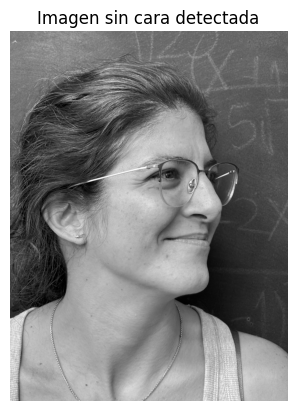

In [14]:
# Llamado a la funcion de recortar caras
caras = recortar_caras(lista_imagenes)

In [12]:
print(f"Se recortaron {len(caras)} imágenes.")

Se recortaron 324 imágenes.


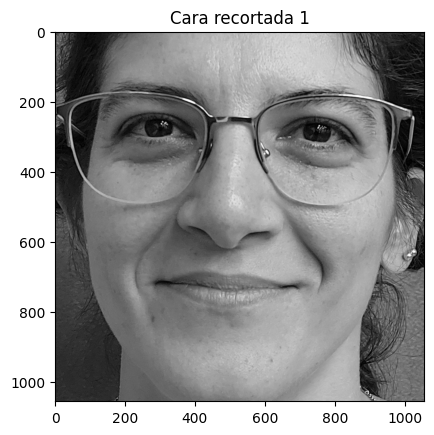

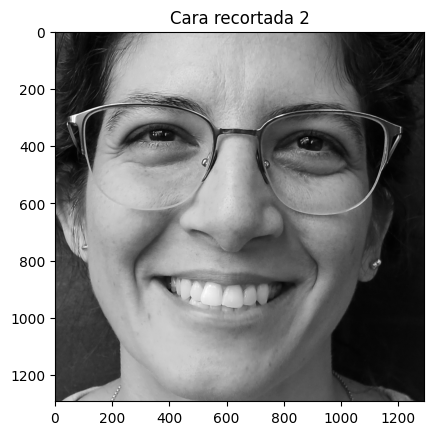

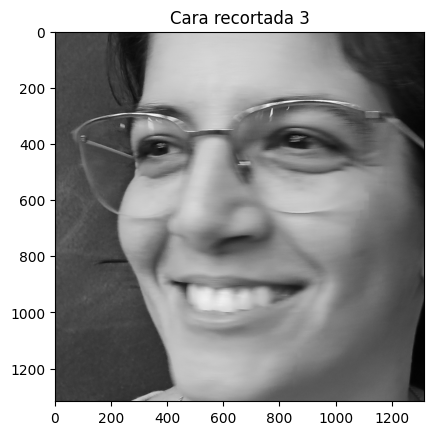

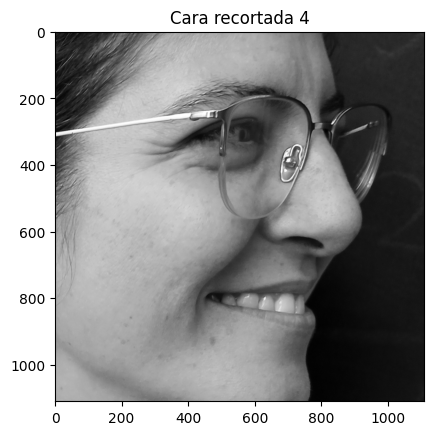

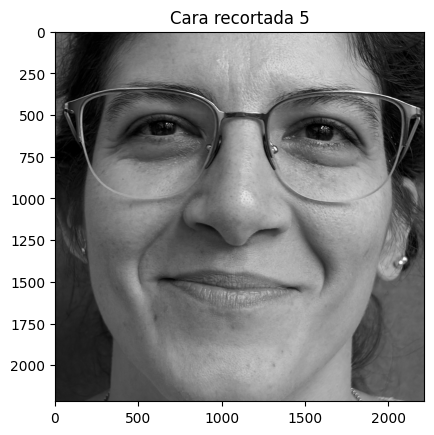

In [15]:
# Mostrar las caras recortadas (primeras 5)
for i in range(min(5, len(caras))):
    plt.imshow(caras[i], cmap='gray')
    plt.title(f"Cara recortada {i + 1}")
    plt.show()

In [16]:
# Deteccion de rostro
import mediapipe as mp

mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.5)

In [17]:
# Escarlar imagenes
tamaños_comunes = [(70, 70)]

# Escalar las imágenes a cada tamaño común
imagenes_escaladas = [cv2.resize(image, tamaños_comunes[0]) for image in caras]


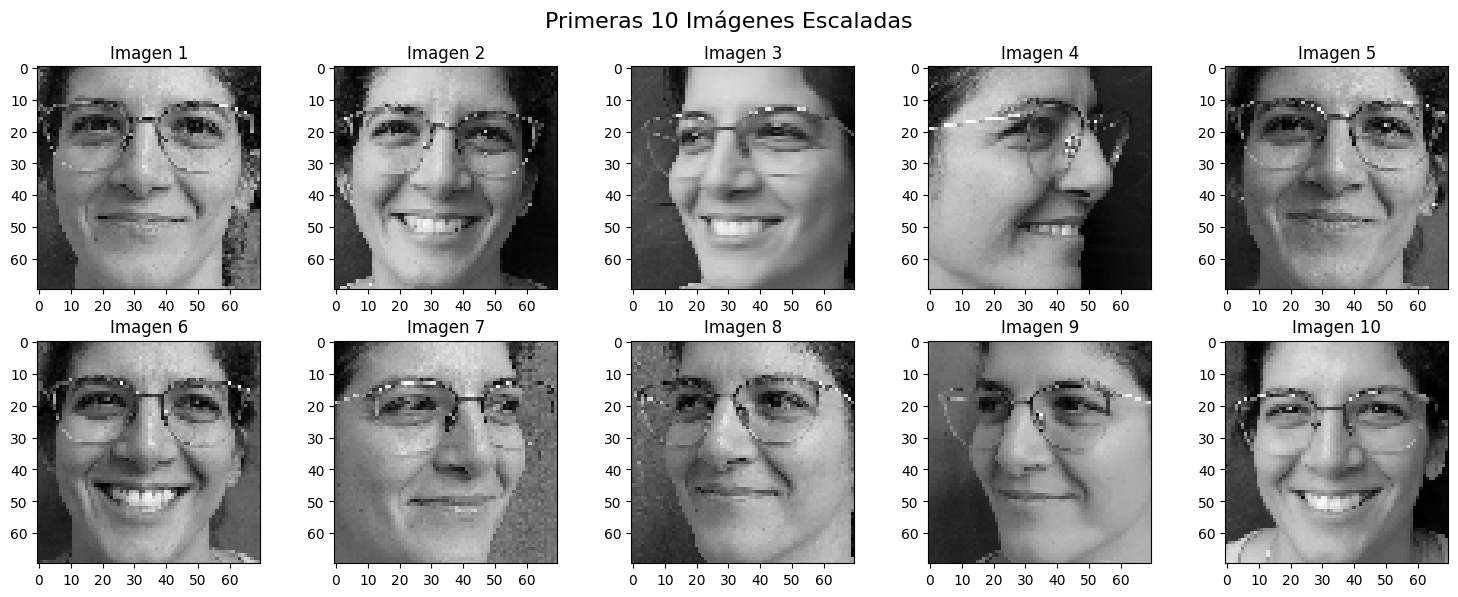

In [18]:
# Visualizar las primeras imágenes escaladas
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 filas, 5 columnas
fig.suptitle("Primeras 10 Imágenes Escaladas", fontsize=16)

for i, imagen in enumerate(imagenes_escaladas[:10]):
    ax = axes[i // 5, i % 5]  # Calcula la posición en la cuadrícula
    ax.imshow(imagen, cmap='gray')  # Muestra la imagen en escala de grises
    ax.set_title(f"Imagen {i + 1}")

    # Agregar valores en los ejes
    ax.set_xticks(np.arange(0, imagen.shape[1], 10))  # Marcas cada 10 píxeles en el eje x
    ax.set_yticks(np.arange(0, imagen.shape[0], 10))  # Marcas cada 10 píxeles en el eje y
    ax.set_xticklabels(np.arange(0, imagen.shape[1], 10))  # Etiquetas cada 10 píxeles en el eje x
    ax.set_yticklabels(np.arange(0, imagen.shape[0], 10))  # Etiquetas cada 10 píxeles en el eje y

plt.tight_layout()
plt.show()

In [20]:
# Obtener las componentes principales a partir de las imagenes escaladas

from sklearn.decomposition import PCA

# Convertir la lista de imágenes escaladas a un array NumPy
imagenes_escaladas_array = np.array(imagenes_escaladas)

# Aplanar las imágenes para que sean vectores
n_samples, h, w = imagenes_escaladas_array.shape
X = imagenes_escaladas_array.reshape((n_samples, h * w))

# Calcular las componentes principales
pca = PCA(n_components=0.95) # Ejemplo: mantener el 95% de la varianza
X_pca = pca.fit_transform(X)

# Imprimir la forma de los datos reducidos
print("Forma de los datos después de PCA:", X_pca.shape)

# Número de componentes principales
print("Número de componentes principales:", pca.n_components_)

# Mostrar las primeras componentes principales
print("Primeras componentes principales:\n", pca.components_[:5])

# Puedes acceder a la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:", explained_variance_ratio)

# Varianza explicada acumulada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("Varianza explicada acumulada:", cumulative_variance_ratio)

Forma de los datos después de PCA: (312, 185)
Número de componentes principales: 185
Primeras componentes principales:
 [[ 0.00555154  0.00389804  0.0022823  ...  0.01786524  0.01676471
   0.01623015]
 [ 0.0138969   0.01572478  0.0153093  ...  0.01867437  0.01845364
   0.01869414]
 [-0.00132073  0.00212452  0.00233595 ... -0.00914158 -0.00853797
  -0.00370233]
 [ 0.00490067  0.0115315   0.01947777 ... -0.00424172 -0.00598591
  -0.00456305]
 [ 0.01515496  0.02091004  0.02308745 ... -0.00109179 -0.00130075
   0.00307449]]
Varianza explicada por cada componente: [0.19314137 0.11793774 0.07325716 0.04217014 0.03801109 0.03297011
 0.02340442 0.02013198 0.01777166 0.01474872 0.01312593 0.01291178
 0.01199334 0.01073856 0.00962836 0.00863305 0.00843215 0.00768232
 0.00739159 0.00727268 0.00690985 0.00654585 0.00645771 0.00601179
 0.0059454  0.00547505 0.00526239 0.00488677 0.00447949 0.00436649
 0.00431266 0.00420962 0.00403468 0.00388837 0.00372531 0.00354476
 0.00345181 0.00338017 0.0033743

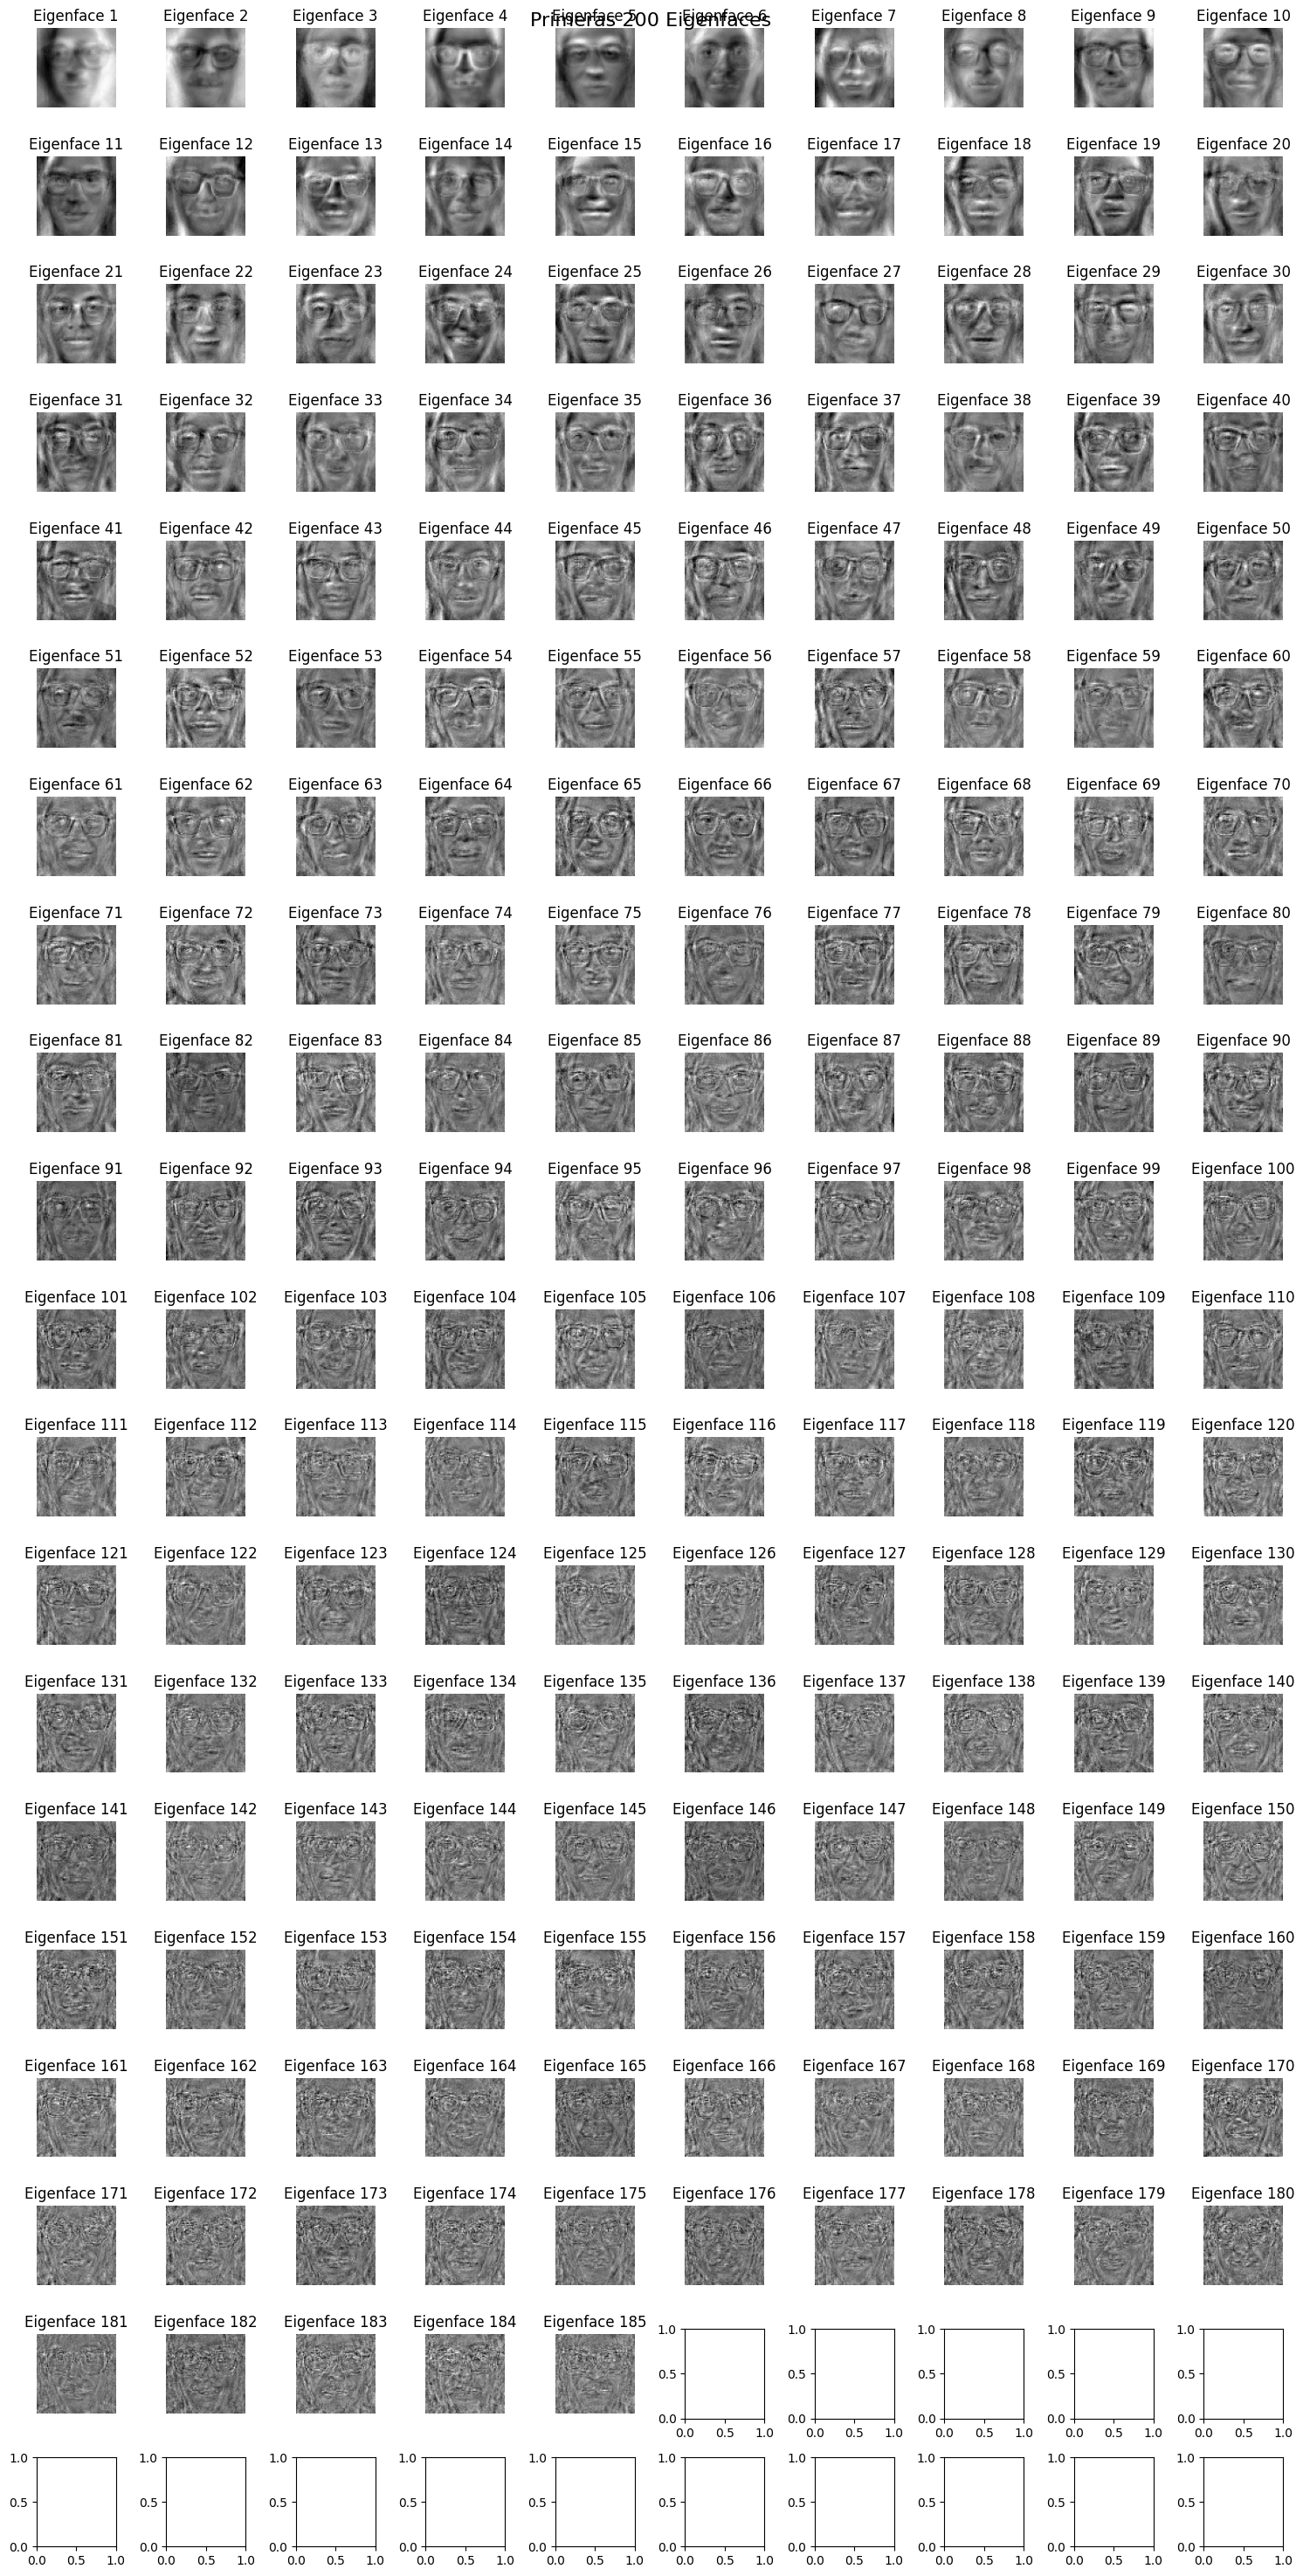

In [21]:
# Graficar las 200 primeras eigenfaces

import matplotlib.pyplot as plt
# Obtener las eigenfaces (componentes principales)
eigenfaces = pca.components_

# Mostrar las primeras 200 eigenfaces
fig, axes = plt.subplots(20, 10, figsize=(15, 30))  # Ajusta el tamaño de la figura según sea necesario
fig.suptitle("Primeras 200 Eigenfaces", fontsize=16)

for i, eigenface in enumerate(eigenfaces[:200]):
    ax = axes[i // 10, i % 10]  # Calcula la posición en la cuadrícula
    eigenface_image = eigenface.reshape(h, w) # Redimensionar la eigenface
    ax.imshow(eigenface_image, cmap='gray')
    ax.set_title(f"Eigenface {i + 1}")
    ax.axis('off')  # Ocultar los ejes

plt.tight_layout()
plt.show()


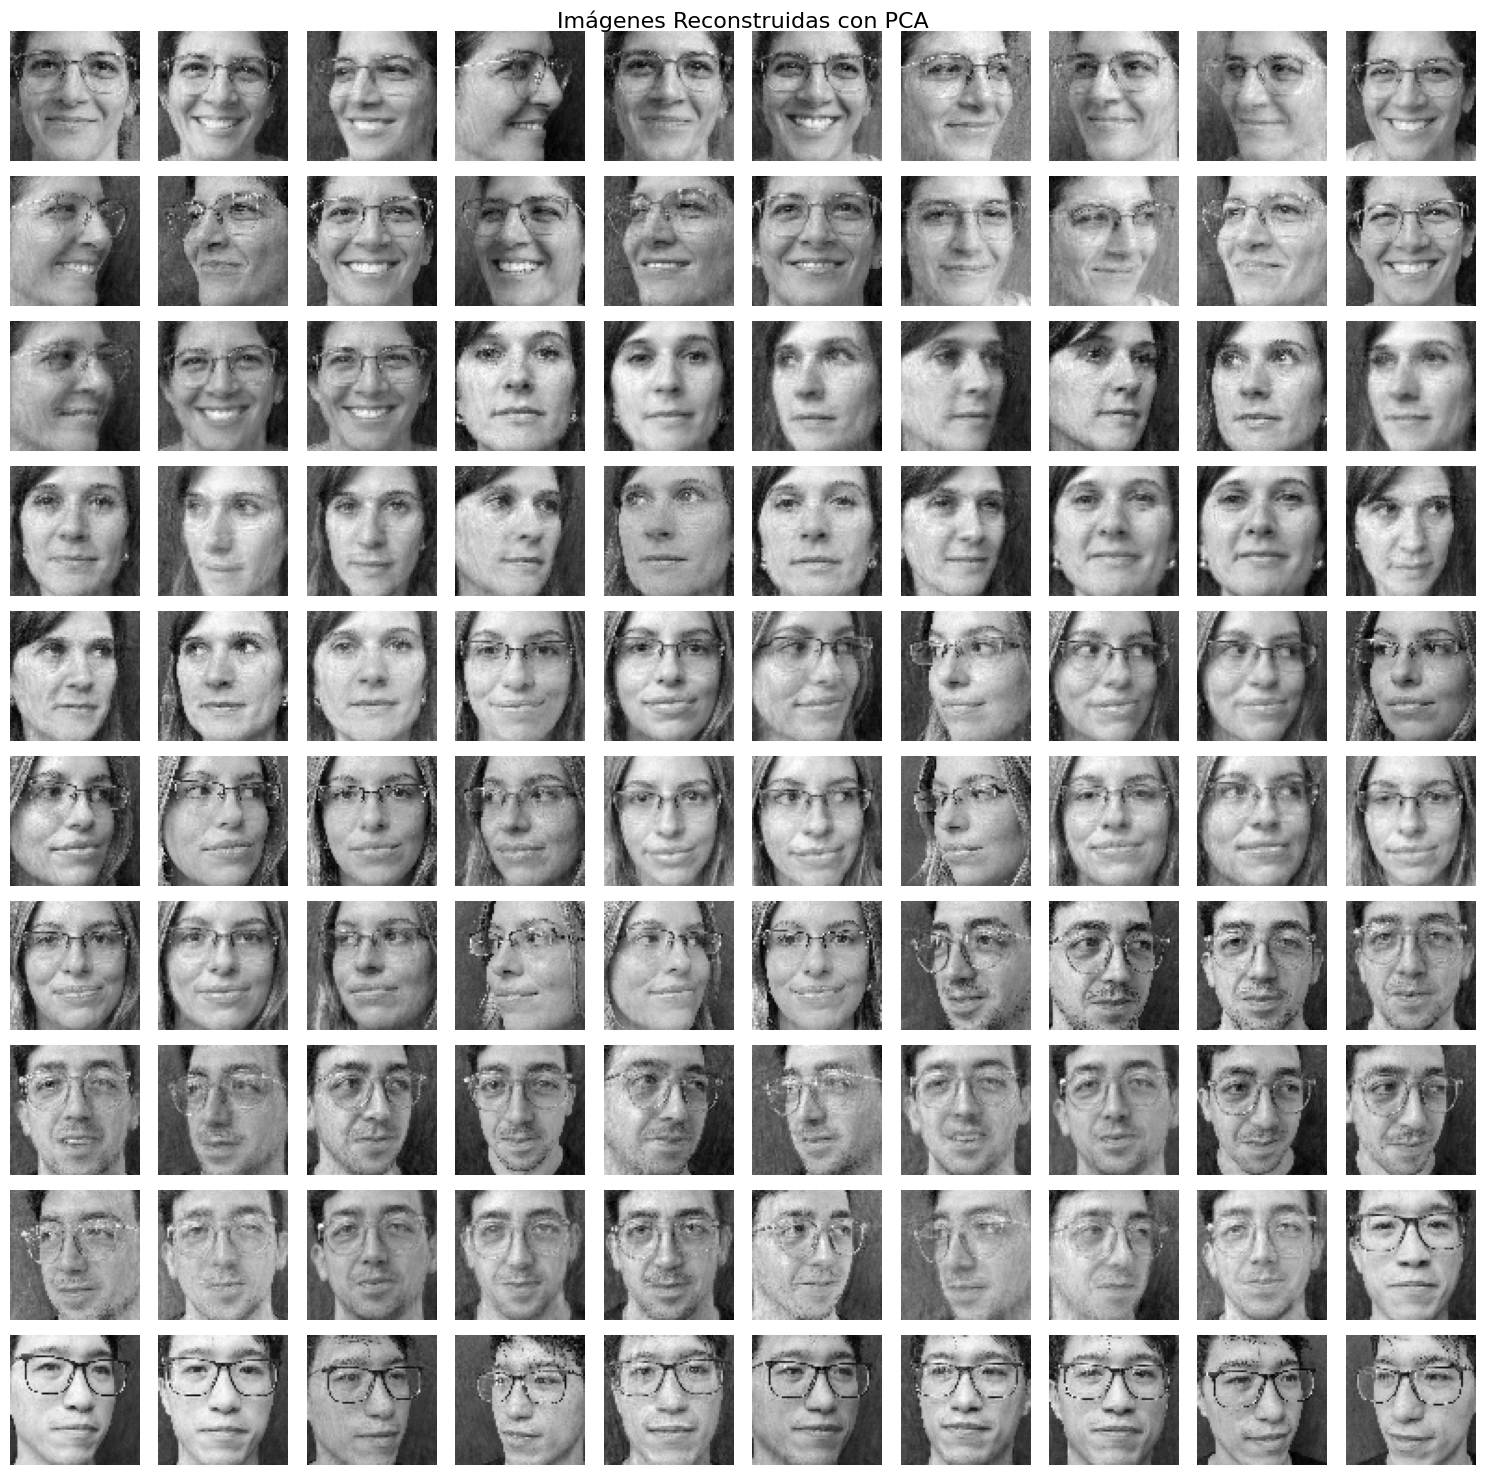

In [26]:
# prompt: graficar las imagenes resultantes de las  primeras componentes principales

import matplotlib.pyplot as plt
# Reconstruir las imágenes a partir de las componentes principales
X_reconstructed = pca.inverse_transform(X_pca)

# Reshape para obtener las imágenes originales
reconstructed_images = X_reconstructed.reshape((n_samples, h, w))


# Mostrar las imágenes reconstruidas
fig, axes = plt.subplots(10, 10, figsize=(15, 15))  # Ajusta el tamaño de la figura según sea necesario
fig.suptitle("Imágenes Reconstruidas con PCA", fontsize=16)

for i, reconstructed_image in enumerate(reconstructed_images[:100]):
    ax = axes[i // 10, i % 10]  # Calcula la posición en la cuadrícula
    ax.imshow(reconstructed_image, cmap='gray')
    ax.axis('off')  # Ocultar los ejes

plt.tight_layout()
plt.show()


Los 100 pares de caras más cercanos:
Distancia: 322.65, Imagen 234 - Imagen 235
Distancia: 418.40, Imagen 305 - Imagen 306
Distancia: 453.08, Imagen 306 - Imagen 307
Distancia: 490.96, Imagen 78 - Imagen 83
Distancia: 501.84, Imagen 166 - Imagen 191
Distancia: 502.97, Imagen 164 - Imagen 189
Distancia: 540.56, Imagen 305 - Imagen 307
Distancia: 543.65, Imagen 196 - Imagen 197
Distancia: 665.57, Imagen 165 - Imagen 190
Distancia: 778.14, Imagen 140 - Imagen 142
Distancia: 847.72, Imagen 38 - Imagen 39
Distancia: 907.62, Imagen 107 - Imagen 109
Distancia: 948.62, Imagen 48 - Imagen 49
Distancia: 960.23, Imagen 127 - Imagen 135
Distancia: 960.98, Imagen 228 - Imagen 229
Distancia: 988.55, Imagen 285 - Imagen 290
Distancia: 1071.64, Imagen 227 - Imagen 228
Distancia: 1077.60, Imagen 131 - Imagen 139
Distancia: 1154.93, Imagen 144 - Imagen 158
Distancia: 1191.87, Imagen 227 - Imagen 229
Distancia: 1274.41, Imagen 146 - Imagen 147
Distancia: 1285.26, Imagen 293 - Imagen 300
Distancia: 1291.7

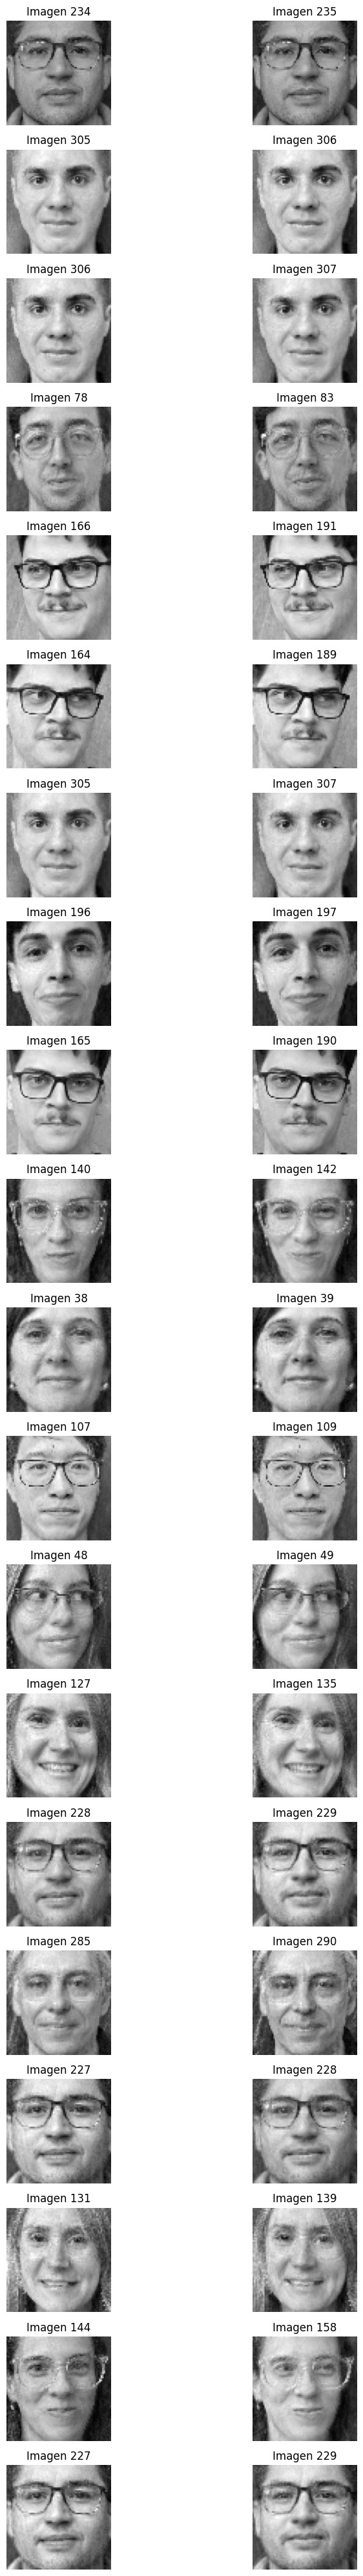

In [27]:
# prompt: calcular la distancia euclidea de las caras recortadas escaladas y mostrar los 100 pares mas cercanos. No considerar las distancias con sigo mismas, tampoco repetir los integrantes del par (no importa el orden) . Luego imprimir las imagenes de los 20 pares de caras mas cercanas. corregir el error anterior

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean

# ... (previous code) ...

# Calcular distancias euclidianas
distances = []
for i in range(len(X_pca)):
    for j in range(i + 1, len(X_pca)):
        dist = euclidean(X_pca[i], X_pca[j])
        distances.append((dist, i, j))

# Ordenar distancias
distances.sort()

# Mostrar los 100 pares más cercanos
print("Los 100 pares de caras más cercanos:")
for dist, i, j in distances[:100]:
    print(f"Distancia: {dist:.2f}, Imagen {i +1} - Imagen {j+1}")

# Mostrar las imágenes de los 20 pares más cercanos
print("\nImágenes de los 20 pares de caras más cercanos:")

# Asegurarse que reconstructed_images existe y tiene la forma correcta
if 'reconstructed_images' in locals() and reconstructed_images.shape[0] > 0:
  fig, axes = plt.subplots(20, 2, figsize=(10, 40))
  for i, (dist, idx1, idx2) in enumerate(distances[:20]):
      ax1 = axes[i, 0]
      ax1.imshow(reconstructed_images[idx1], cmap='gray')
      ax1.set_title(f"Imagen {idx1 + 1}")
      ax1.axis('off')

      ax2 = axes[i, 1]
      ax2.imshow(reconstructed_images[idx2], cmap='gray')
      ax2.set_title(f"Imagen {idx2 + 1}")
      ax2.axis('off')
  plt.tight_layout()
  plt.show()
else:
  print("Error: reconstructed_images no está definida o no contiene datos.")
